
# ### 1. Importação das Bibliotecas

In [12]:
import sys
import os

# Caminho absoluto para a pasta 'scripts' (fora da pasta notebooks)
script_path = os.path.join(os.getcwd(), '..', 'scripts')  # Isso vai buscar a pasta scripts no nível acima
sys.path.append(script_path)

# Agora você deve conseguir importar o módulo 'preprocessing'
from preprocessing import load_data, clean_data


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carregar os arquivos CSV
admission_data = pd.read_csv('../data/HDHI Admission data.csv')
mortality_data = pd.read_csv('../data/HDHI Mortality Data.csv')
pollution_data = pd.read_csv('../data/HDHI Pollution Data.csv')

# Exibir as primeiras linhas para uma visão geral
print("Admission Data:")
print(admission_data.head())

print("\nMortality Data:")
print(mortality_data.head())

print("\nPollution Data:")
print(pollution_data.head())


Admission Data:
   SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0              

In [15]:
# Informações sobre os dados
print("\nInformações sobre os dados de admissões:")
print(admission_data.info())

print("\nInformações sobre os dados de mortalidade:")
print(mortality_data.info())

print("\nInformações sobre os dados de poluição:")
print(pollution_data.info())



Informações sobre os dados de admissões:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  ob

In [16]:
# Estatísticas descritivas
print("\nEstatísticas descritivas de admissões:")
print(admission_data.describe())

print("\nEstatísticas descritivas de mortalidade:")
print(mortality_data.describe())

print("\nEstatísticas descritivas de poluição:")
print(pollution_data.describe())



Estatísticas descritivas de admissões:
                SNO           AGE  DURATION OF STAY  \
count  15757.000000  15757.000000      15757.000000   
mean    7879.000000     61.426160          6.415054   
std     4548.798431     13.420862          5.011421   
min        1.000000      4.000000          1.000000   
25%     3940.000000     54.000000          3.000000   
50%     7879.000000     62.000000          5.000000   
75%    11818.000000     70.000000          8.000000   
max    15757.000000    110.000000         98.000000   

       duration of intensive unit stay      SMOKING        ALCOHOL  \
count                      15757.00000  15757.000000  15757.000000   
mean                           3.80377      0.050327      0.064797   
std                            4.01564      0.218625      0.246174   
min                            0.00000      0.000000      0.000000   
25%                            1.00000      0.000000      0.000000   
50%                            3.00000      

In [17]:
# Verificar valores ausentes
print("\nValores ausentes no conjunto de dados de admissões:")
print(admission_data.isnull().sum())

print("\nValores ausentes no conjunto de dados de mortalidade:")
print(mortality_data.isnull().sum())

print("\nValores ausentes no conjunto de dados de poluição:")
print(pollution_data.isnull().sum())



Valores ausentes no conjunto de dados de admissões:
SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                       

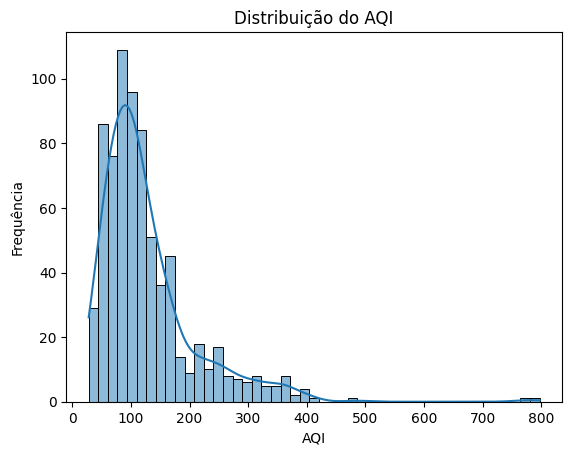

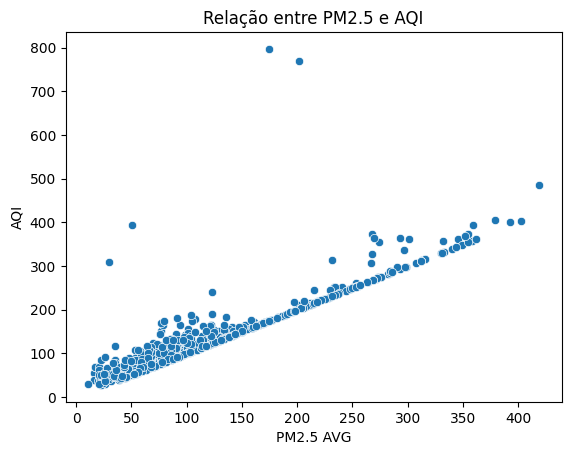

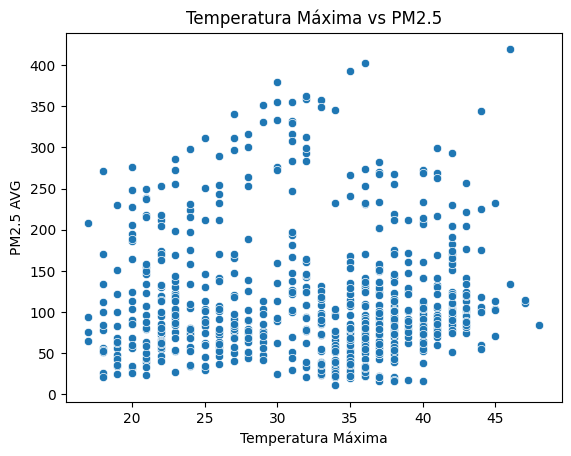

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de distribuição do AQI
sns.histplot(pollution_data['AQI'], kde=True)
plt.title('Distribuição do AQI')
plt.xlabel('AQI')
plt.ylabel('Frequência')
plt.show()

# Gráfico de correlação entre PM2.5 e AQI
sns.scatterplot(x=pollution_data['PM2.5 AVG'], y=pollution_data['AQI'])
plt.title('Relação entre PM2.5 e AQI')
plt.xlabel('PM2.5 AVG')
plt.ylabel('AQI')
plt.show()

# Gráfico de correlação entre Temperatura e PM2.5
sns.scatterplot(x=pollution_data['MAX TEMP'], y=pollution_data['PM2.5 AVG'])
plt.title('Temperatura Máxima vs PM2.5')
plt.xlabel('Temperatura Máxima')
plt.ylabel('PM2.5 AVG')
plt.show()


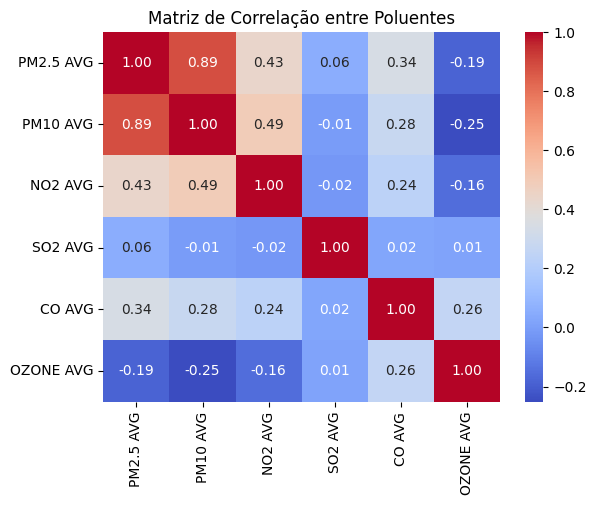

In [36]:
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = pollution_data[['PM2.5 AVG', 'PM10 AVG', 'NO2 AVG', 'SO2 AVG', 'CO AVG', 'OZONE AVG']].corr()

# Exibir a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Poluentes')
plt.show()


In [38]:
# Verificar as colunas do dataset de mortalidade
print("\nColunas do conjunto de dados de mortalidade:")
print(mortality_data.columns)



Colunas do conjunto de dados de mortalidade:
Index(['S.NO', 'MRD', 'AGE', 'GENDER ', 'RURAL/URBAN', 'DATE OF BROUGHT DEAD'], dtype='object')


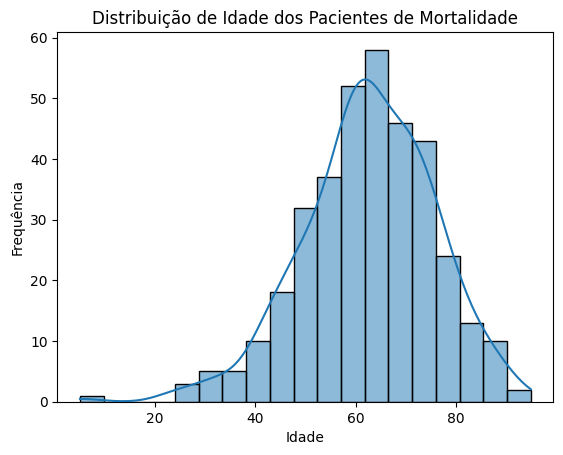

In [41]:
# Distribuição da idade dos pacientes
sns.histplot(mortality_data['AGE'], kde=True)
plt.title('Distribuição de Idade dos Pacientes de Mortalidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


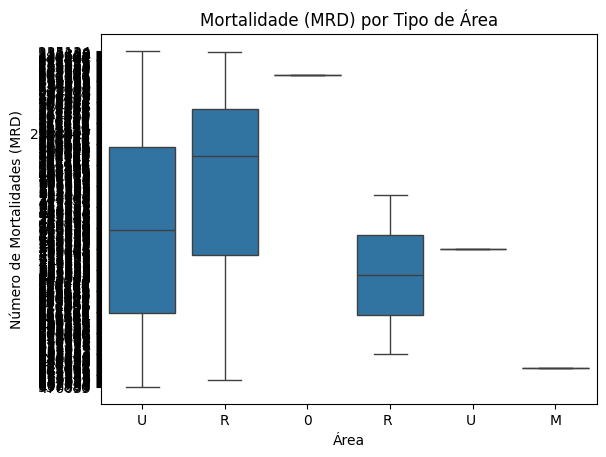

In [42]:
# Comparar mortalidade entre áreas urbanas e rurais
sns.boxplot(x=mortality_data['RURAL/URBAN'], y=mortality_data['MRD'])
plt.title('Mortalidade (MRD) por Tipo de Área')
plt.xlabel('Área')
plt.ylabel('Número de Mortalidades (MRD)')
plt.show()
